
# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.<br>
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.<br>
● ‘Neighborhood’ indicates the
location of the hospital.<br>
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.<br>
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

## Research Questions
> What are Percentage of no_showed to showed patient?<br>what are factors affecting rate of no__showed patient? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshow.csv')

In [3]:
# general description of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# see how many columns and rows
df.shape

(110527, 14)

In [5]:
# looking fo any missing data and checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#checking for duplication
sum(df.duplicated())

0

### Data Cleaning 

In [7]:
# Change ScheduledDay, AppointmentID to datetime datatypes
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format=('%Y-%m-%dT%H:%M:%SZ'))
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format=('%Y-%m-%dT%H:%M:%SZ'))

In [8]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

__checking for weird value for each column and modifying it__

In [9]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
# changing df['No-show'] value to 0,1
df['No-show'].replace(['No', 'Yes'],['0', '1'],inplace = True)

In [11]:
df['No-show'].unique()

array(['0', '1'], dtype=object)

In [12]:
# changing type of df['No-show'] to int
df['No-show'] = pd.to_numeric(df['No-show'])
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                    int64
dtype: object

In [13]:
# checking df['SMS_received']
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [14]:
# checking df['Handcap']
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [16]:
# converting degree 2,3,4 to 1 
df['Handcap'].replace({2:1,3:1,4:1}, inplace = True)

In [17]:
df['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

In [18]:
# checking df['Alcoholism']
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [19]:
# checking df['Diabetes']
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [20]:
# checking df['Hipertension']
df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [21]:
# checking df['Scholarship']
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [22]:
# checking df['Neighbourhood']
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [23]:
# checking df['Age']
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [24]:
# drop age <0
df[df['Age']==-1]
df.drop(index = df[df['Age']==-1].index , inplace = True)

In [25]:
# drop age >100
df[df['Age']>100]
df.drop(index = df[df['Age']>100].index , inplace = True)

In [26]:
# checking df['Gender']
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [27]:
# modifiying types of scholarship, hipertension, diabetes, alcoholism, handcap, sms_received, no_show to bool for investigation
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Hipertension'] = df['Hipertension'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Handcap'] = df['Handcap'].astype(bool)
df['SMS_received'] = df['SMS_received'].astype(bool)
df['No-show'] = df['No-show'].astype(bool)
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
No-show                     bool
dtype: object

In [28]:
# modifiying columns names
df.rename(columns={'PatientId':'Patient_Id','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},inplace=True)
df.rename(columns=lambda x: x.strip().lower(),inplace=True)

In [29]:
# see ifther are any duplicated rows after dropping appointment_id
df.drop(columns=['appointment_id'],inplace = True)
sum(df.duplicated())

617

In [30]:
# drop duplicated rows
df.drop_duplicates(keep = 'first',inplace = True)

In [31]:
# make df['scheduled_day'] with no hour format like df['appointment_day']
df['scheduled_day'] = df['scheduled_day'].astype(str)

In [32]:
df['scheduled_day'] = df['scheduled_day'].apply(lambda x: x.split()[0])

In [33]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df.dtypes

patient_id                float64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                  bool
hypertension                 bool
diabetes                     bool
alcoholism                   bool
handicap                     bool
sms_received                 bool
no_show                      bool
dtype: object

In [34]:
df.head(3)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False


In [35]:
# see if there is appointment_day before scheduled_day 
df['time_delta'] = df['appointment_day'] - df['scheduled_day']
df[df['time_delta']<'0 days']

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delta
27033,7.839273e+12,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,False,False,False,False,True,False,True,-1 days
55226,7.896294e+12,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,False,False,False,False,True,False,True,-1 days
64175,2.425226e+13,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,False,False,False,False,False,False,True,-1 days
71533,9.982316e+14,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,False,False,False,False,False,False,True,-6 days
72362,3.787482e+12,M,2016-05-04,2016-05-03,7,TABUAZEIRO,False,False,False,False,False,False,True,-1 days


In [36]:
# dropping rows with time delta <0
df.drop(index = df[df['time_delta']<'0 days'].index , inplace = True)

In [37]:
# make columns with week day for investigation
df['week_day'] = df['appointment_day'].dt.day_name()

In [38]:
# saving cleaned and modified CVS
df.to_csv('modified_noshow.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are Percentage of no_showed to showed patient?)

In [39]:
Total_Show_Per = df['no_show'].value_counts()

In [40]:
per_no_show = df['no_show'].value_counts()[1]/df['no_show'].value_counts()*100
per_show = df['no_show'].value_counts()[0]/df['no_show'].value_counts()*100

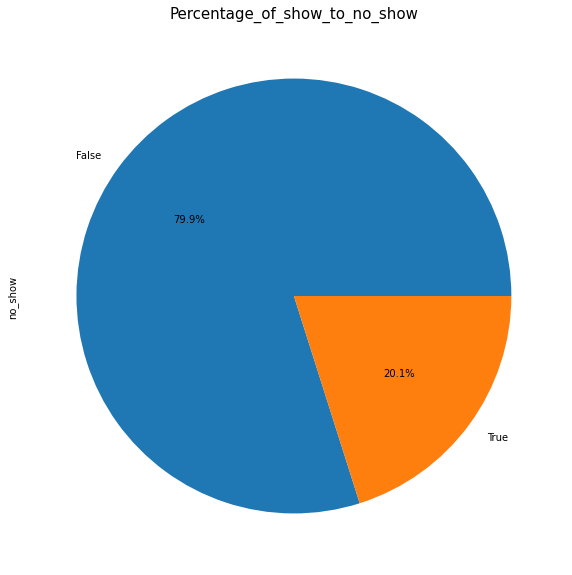

In [41]:
Total_Show_Per.plot(kind = 'pie', figsize = (10,10),autopct='%1.1f%%');
plt.title('Percentage_of_show_to_no_show',fontsize = 15);

__From above, we can see that percentage of patient showed at appointment date higher tha percentage of patient no showed at appointmnet date__

### Research Question 2  (what are factors affecting rate of no__showed patient?)

__Factor_1 : neighbourhood__

In [42]:
neighbourhood_shown_per = df.groupby('no_show')['neighbourhood'].value_counts(True)[0]*100

In [43]:
neighbourhood_not_shown_per = df.groupby('no_show')['neighbourhood'].value_counts(True)[1]*100

In [44]:
df_showed = pd.DataFrame(neighbourhood_shown_per)
df_not_showed = pd.DataFrame(neighbourhood_not_shown_per)

In [45]:
df_showed.rename(columns={'neighbourhood':'%showed'},inplace = True)
df_not_showed.rename(columns={'neighbourhood':'%_not_showed'},inplace = True)

In [46]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [47]:
df_combined = df_showed.merge(df_not_showed, left_on='neighbourhood', right_on='neighbourhood', how='outer')

In [48]:
df_combined.sort_values(by='%showed',ascending = False).head(40)

,neighbourhood,%showed,%_not_showed
0,JARDIM CAMBURI,7.052472,6.466649
1,MARIA ORTIZ,5.221016,5.516336
2,RESISTÊNCIA,3.988656,4.000362
3,JARDIM DA PENHA,3.692525,2.855462
4,CENTRO,2.978394,3.145081
5,SANTA MARTHA,2.977255,2.212870
6,ITARARÉ,2.924862,4.081817
7,TABUAZEIRO,2.910056,2.565843
8,SANTO ANTÔNIO,2.568366,2.154041
9,BONFIM,2.520530,2.479862


In [49]:
df_combined.set_index('neighbourhood', inplace = True)

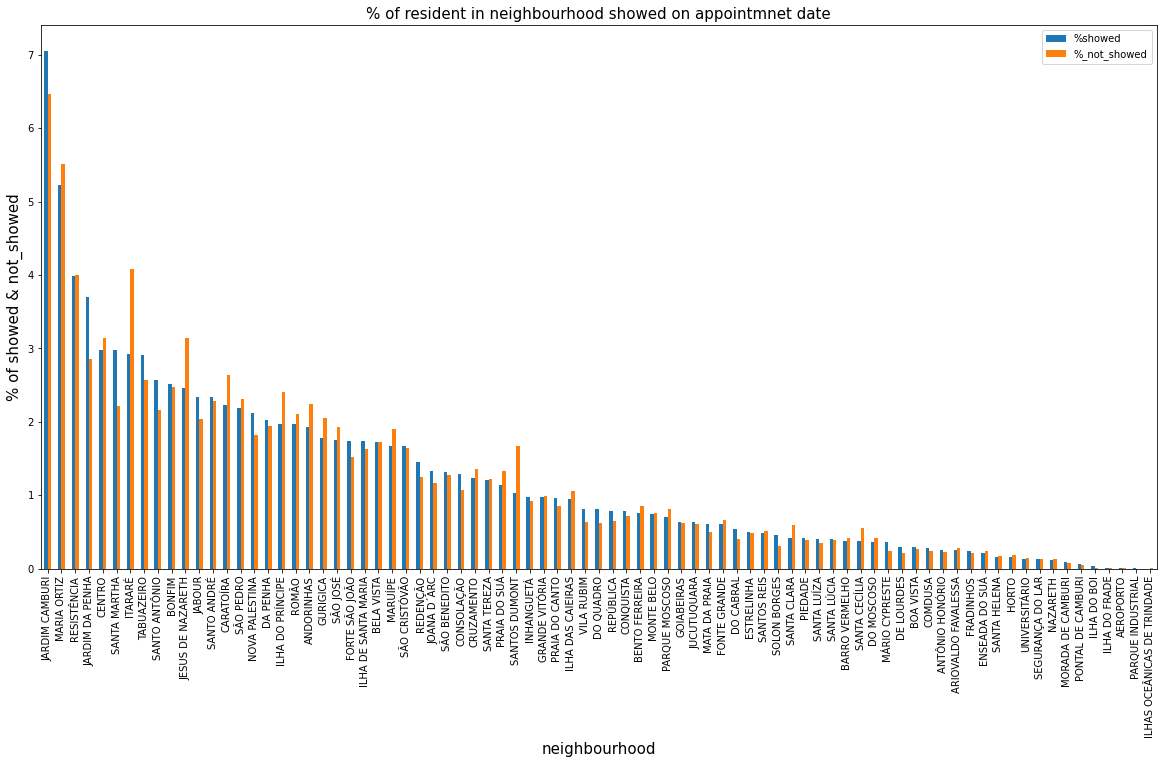

In [50]:
df_combined.plot(kind='bar',figsize=(20,10));
plt.title('% of resident in neighbourhood showed on appointmnet date',fontsize = 15);
plt.xlabel('neighbourhood', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, in general we can see that neighbourhood have no effect on showed at appointmnet date except for ITARARÉ and JESUS DE NAZARETH and SANTOS DUMONT which need further inveatigation__

__Factor_2 : scholarship__

In [51]:
scholarship_shown_per = df.groupby('no_show')['scholarship'].value_counts(True)[0]*100

In [52]:
scholarship_not_shown_per = df.groupby('no_show')['scholarship'].value_counts(True)[1]*100

In [53]:
df_showed = pd.DataFrame(scholarship_shown_per)
df_not_showed = pd.DataFrame(scholarship_not_shown_per)

In [54]:
df_showed.rename(columns={'scholarship':'%showed'},inplace = True)
df_not_showed.rename(columns={'scholarship':'%_not_showed'},inplace = True)

In [55]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [56]:
df_combined = df_showed.merge(df_not_showed, left_on='scholarship', right_on='scholarship', how='outer')

In [57]:
df_combined.set_index('scholarship', inplace=True)

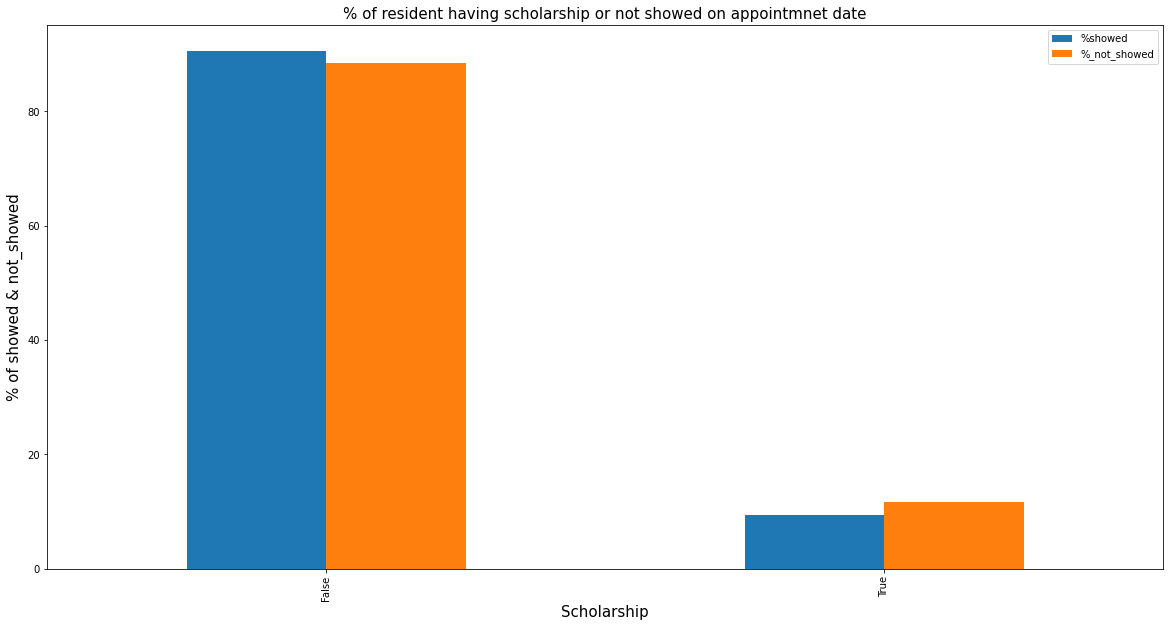

In [58]:
df_combined.plot(kind='bar',figsize=(20,10))
plt.title('% of resident having scholarship or not showed on appointmnet date',fontsize = 15);
plt.xlabel('Scholarship', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, we can see that scholarsip have no effect on showed at appointmnet date__

__Factor_3 : hypertension__

In [59]:
hypertension_shown_per = df.groupby('no_show')['hypertension'].value_counts(True)[0]*100

In [60]:
hypertension_not_shown_per = df.groupby('no_show')['hypertension'].value_counts(True)[1]*100

In [61]:
df_showed = pd.DataFrame(hypertension_shown_per)
df_not_showed = pd.DataFrame(hypertension_not_shown_per)

In [62]:
df_showed.rename(columns={'hypertension':'%showed'},inplace = True)
df_not_showed.rename(columns={'hypertension':'%_not_showed'},inplace = True)

In [63]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [64]:
df_combined = df_showed.merge(df_not_showed, left_on='hypertension', right_on='hypertension', how='outer')

In [65]:
df_combined.set_index('hypertension',inplace=True)

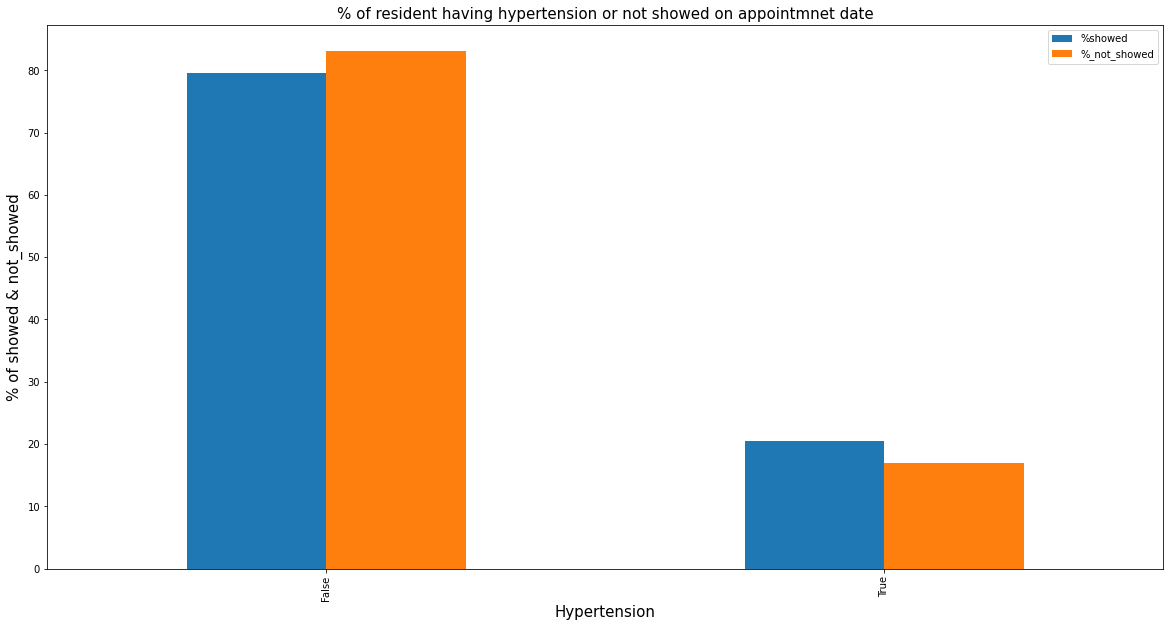

In [66]:
df_combined.plot(kind='bar',figsize=(20,10))
plt.title('% of resident having hypertension or not showed on appointmnet date',fontsize = 15);
plt.xlabel('Hypertension', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, we can see that resident with hypertension or not have no effect on showed at appointmnet date__

__Factor_4 : diabetes__

In [67]:
diabetes_shown_per = df.groupby('no_show')['diabetes'].value_counts(True)[0]*100

In [68]:
diabetes_not_shown_per = df.groupby('no_show')['diabetes'].value_counts(True)[1]*100

In [69]:
df_showed = pd.DataFrame(diabetes_shown_per)
df_not_showed = pd.DataFrame(diabetes_not_shown_per)

In [70]:
df_showed.rename(columns={'diabetes':'%showed'},inplace = True)
df_not_showed.rename(columns={'diabetes':'%_not_showed'},inplace = True)

In [71]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [72]:
df_combined = df_showed.merge(df_not_showed, left_on='diabetes', right_on='diabetes', how='outer')

In [73]:
df_combined.set_index('diabetes',inplace = True)

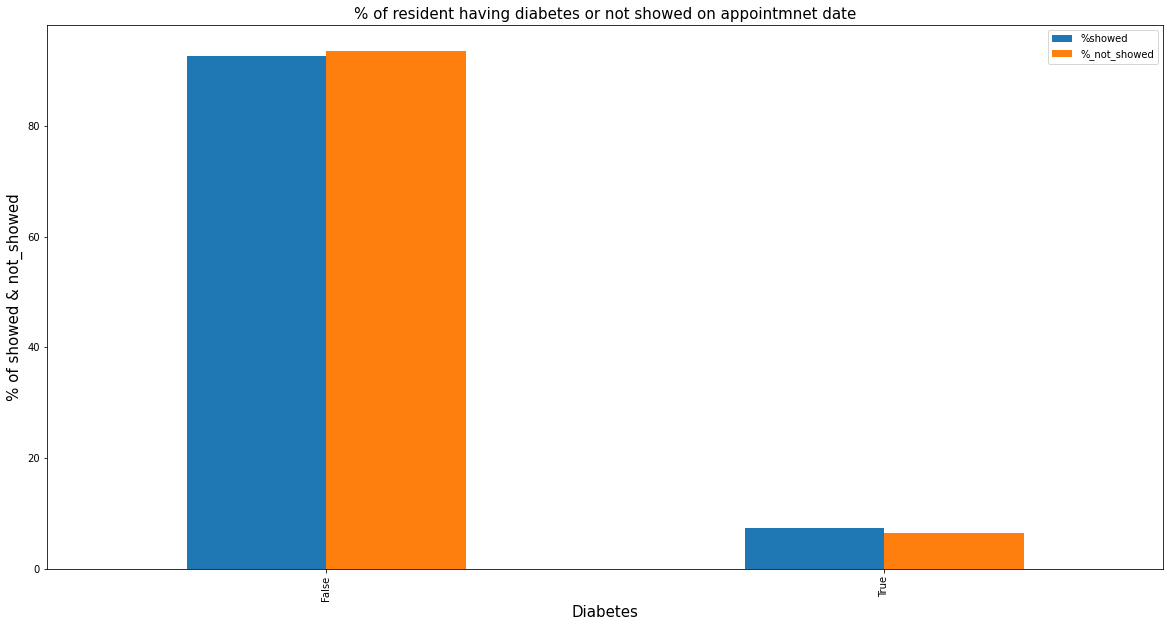

In [74]:
df_combined.plot(kind='bar',figsize=(20,10))
plt.title('% of resident having diabetes or not showed on appointmnet date',fontsize = 15);
plt.xlabel('Diabetes', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, we can see that resident with diabetes or not have no effect on showed at appointmnet date__

__Factor_5 : alcoholism__

In [75]:
alcoholism_shown_per = df.groupby('no_show')['alcoholism'].value_counts(True)[0]*100

In [76]:
alcoholism_not_shown_per = df.groupby('no_show')['alcoholism'].value_counts(True)[1]*100

In [77]:
df_showed = pd.DataFrame(alcoholism_shown_per)
df_not_showed = pd.DataFrame(alcoholism_not_shown_per)

In [78]:
df_showed.rename(columns={'alcoholism':'%showed'},inplace = True)
df_not_showed.rename(columns={'alcoholism':'%_not_showed'},inplace = True)

In [79]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [80]:
df_combined = df_showed.merge(df_not_showed, left_on='alcoholism', right_on='alcoholism', how='outer')

In [81]:
df_combined.set_index('alcoholism',inplace = True)

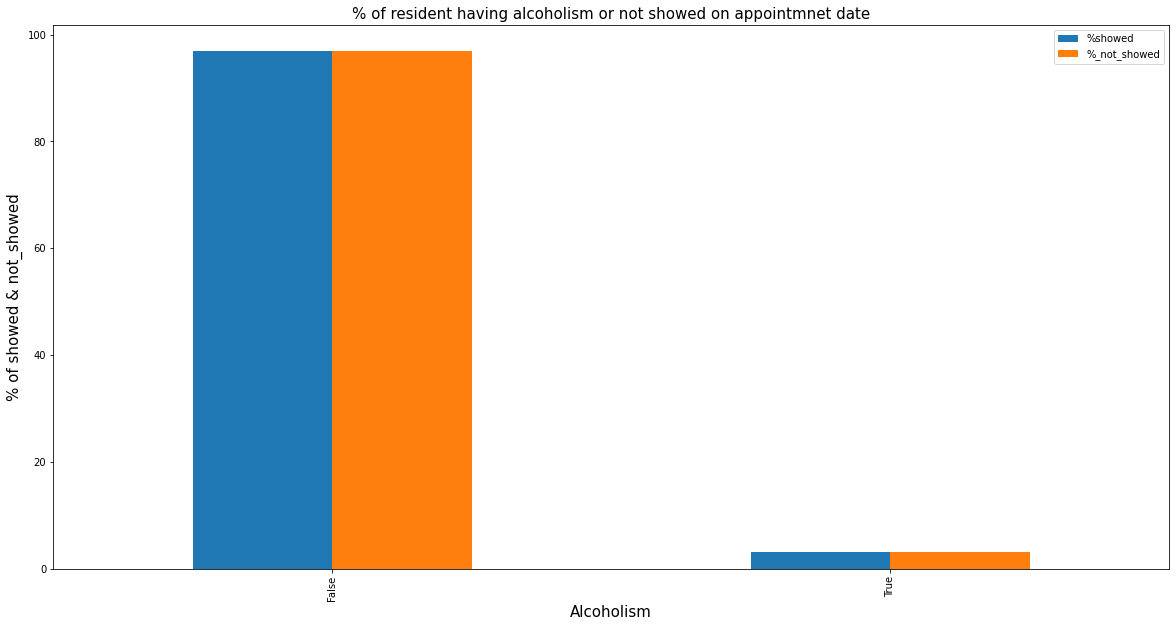

In [82]:
df_combined.plot(kind='bar',figsize=(20,10))
plt.title('% of resident having alcoholism or not showed on appointmnet date',fontsize = 15);
plt.xlabel('Alcoholism', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, we can see that resident with alcoholism or not have no effect on showed at appointmnet date__

__Factor_6 : handicap__

In [83]:
handicap_shown_per = df.groupby('no_show')['handicap'].value_counts(True)[0]*100

In [84]:
handicap_not_shown_per = df.groupby('no_show')['handicap'].value_counts(True)[1]*100

In [85]:
df_showed = pd.DataFrame(handicap_shown_per)
df_not_showed = pd.DataFrame(handicap_not_shown_per)

In [86]:
df_showed.rename(columns={'handicap':'%showed'},inplace = True)
df_not_showed.rename(columns={'handicap':'%_not_showed'},inplace = True)

In [87]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [88]:
df_combined = df_showed.merge(df_not_showed, left_on='handicap', right_on='handicap', how='outer')

In [89]:
df_combined.set_index('handicap',inplace =True)

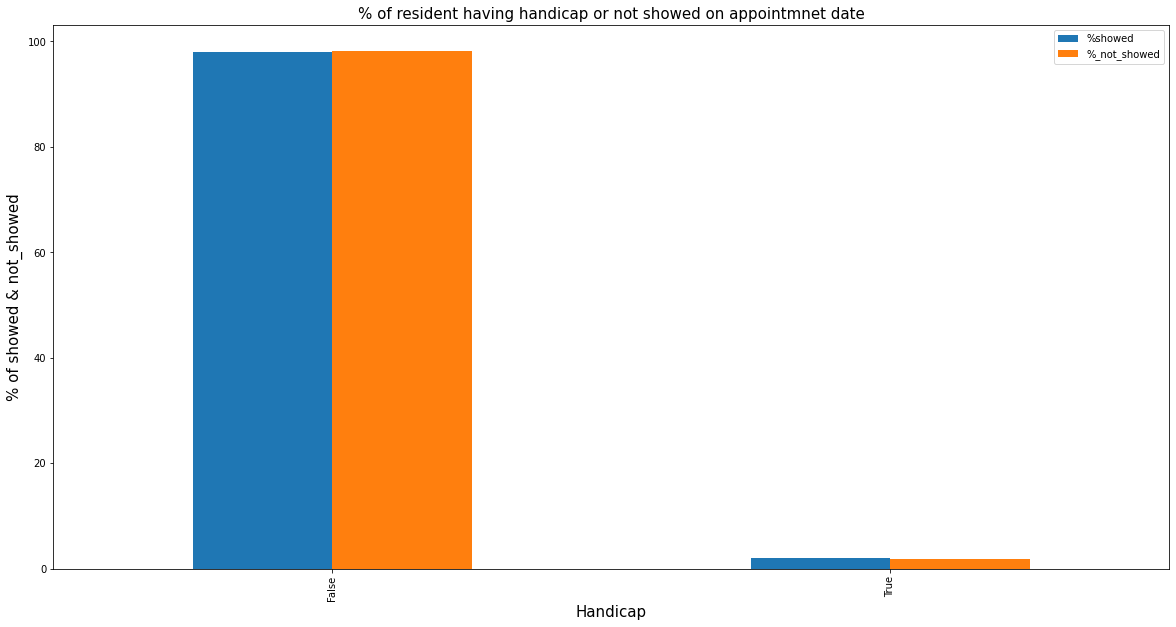

In [90]:
df_combined.plot(kind='bar',figsize=(20,10))
plt.title('% of resident having handicap or not showed on appointmnet date',fontsize = 15);
plt.xlabel('Handicap', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, we can see that resident with handicap or not have no effect on showed at appointmnet date__

__Factor_7 : sms_received__

In [91]:
sms_received_shown_per = df.groupby('no_show')['sms_received'].value_counts(True)[0]*100

In [92]:
sms_received_not_shown_per = df.groupby('no_show')['sms_received'].value_counts(True)[1]*100

In [93]:
df_showed = pd.DataFrame(sms_received_shown_per)
df_not_showed = pd.DataFrame(sms_received_not_shown_per)

In [94]:
df_showed.rename(columns={'sms_received':'%showed'},inplace = True)
df_not_showed.rename(columns={'sms_received':'%_not_showed'},inplace = True)

In [95]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [96]:
df_combined = df_showed.merge(df_not_showed, left_on='sms_received', right_on='sms_received', how='outer')

In [97]:
df_combined.set_index('sms_received',inplace=True)

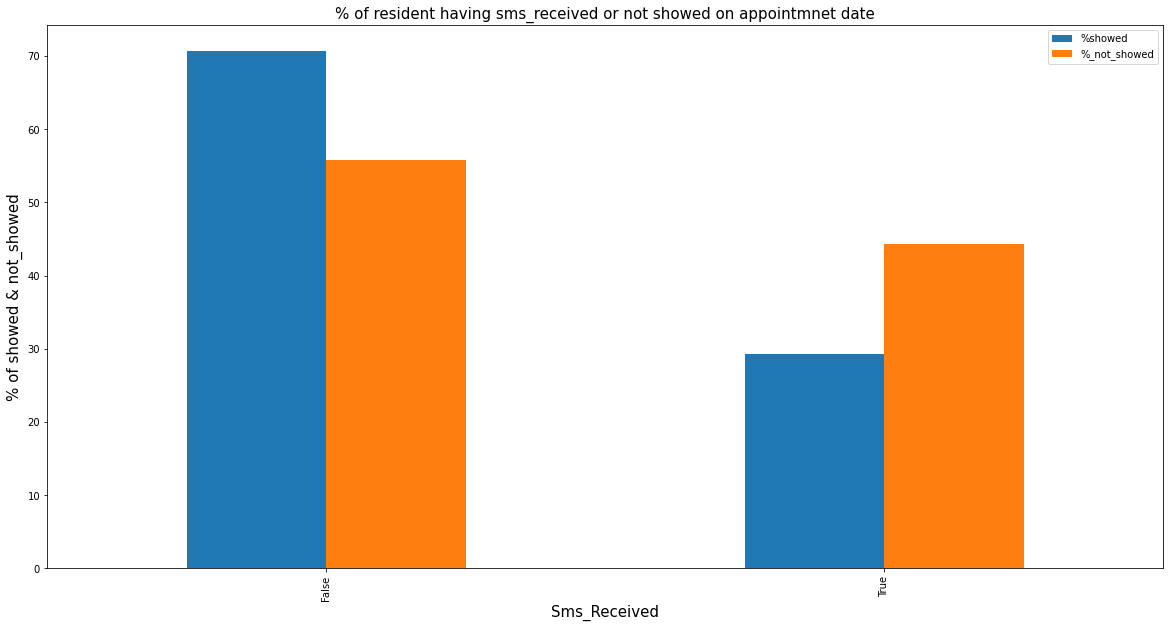

In [98]:
df_combined.plot(kind='bar',figsize=(20,10))
plt.title('% of resident having sms_received or not showed on appointmnet date',fontsize = 15);
plt.xlabel('Sms_Received', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, we can see that % of resident having sms_received have low showing at appointmnet date__

__Factor_8 : week_day__

In [99]:
week_day_shown_per = df.groupby('no_show')['week_day'].value_counts(True)[0]*100

In [100]:
week_day_not_shown_per = df.groupby('no_show')['week_day'].value_counts(True)[1]*100

In [101]:
df_showed = pd.DataFrame(week_day_shown_per)
df_not_showed = pd.DataFrame(week_day_not_shown_per)

In [102]:
df_showed.rename(columns={'week_day':'%showed'},inplace = True)
df_not_showed.rename(columns={'week_day':'%_not_showed'},inplace = True)

In [103]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [104]:
df_combined = df_showed.merge(df_not_showed, left_on='week_day', right_on='week_day', how='outer')

In [105]:
df_combined.set_index('week_day',inplace = True)

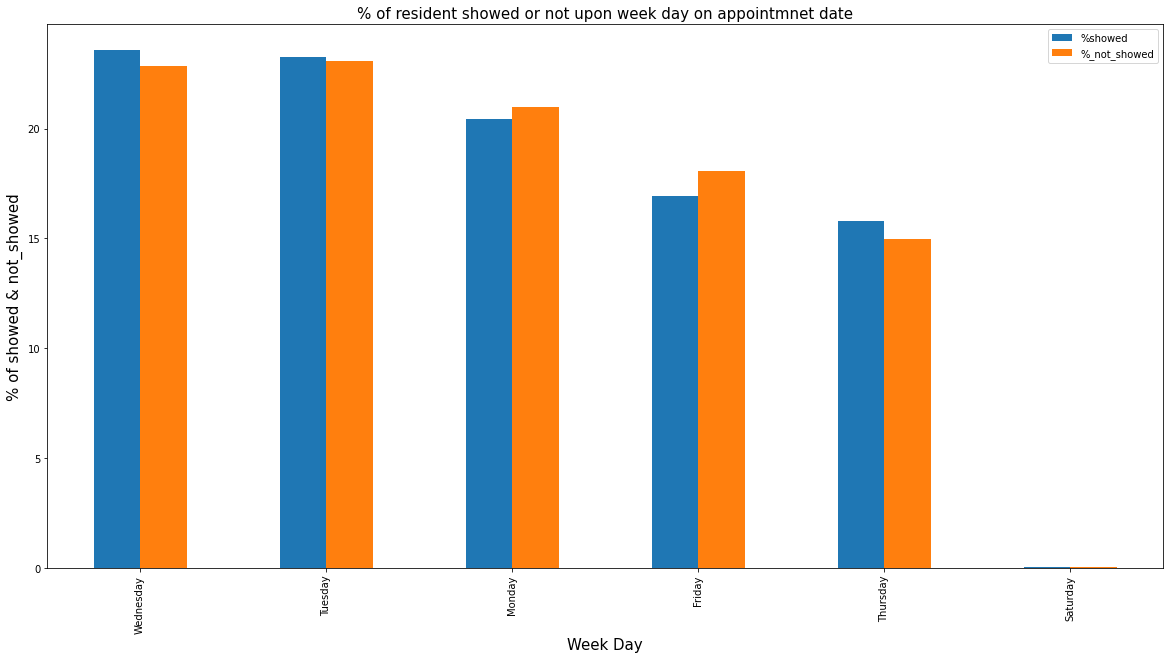

In [106]:
df_combined.plot(kind='bar',figsize=(20,10))
plt.title('% of resident showed or not upon week day on appointmnet date',fontsize = 15);
plt.xlabel('Week Day', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, we can see that week day have no effect on showed at appointmnet date__

__Factor_9 : time_delta__

In [107]:
time_delta_shown_per = df.groupby('no_show')['time_delta'].value_counts(True)[0]*100

In [108]:
time_delta_not_shown_per = df.groupby('no_show')['time_delta'].value_counts(True)[1]*100

In [109]:
df_showed = pd.DataFrame(time_delta_shown_per)
df_not_showed = pd.DataFrame(time_delta_not_shown_per)

In [110]:
df_showed.rename(columns={'time_delta':'%showed'},inplace = True)
df_not_showed.rename(columns={'time_delta':'%_not_showed'},inplace = True)

In [111]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [112]:
df_combined = df_showed.merge(df_not_showed, left_on='time_delta', right_on='time_delta', how='outer')

In [113]:
df_combined.sort_values(by='time_delta',ascending =True).head(25)

,time_delta,%showed,%_not_showed
0,0 days,41.810271,8.068603
2,1 days,4.627615,4.973301
1,2 days,5.811000,7.217848
7,3 days,2.364492,2.869038
3,4 days,4.608253,5.534438
6,5 days,2.735794,3.900806
5,6 days,3.435119,4.520771
4,7 days,4.058133,5.878360
9,8 days,1.872459,3.013847
12,9 days,1.320061,1.973029


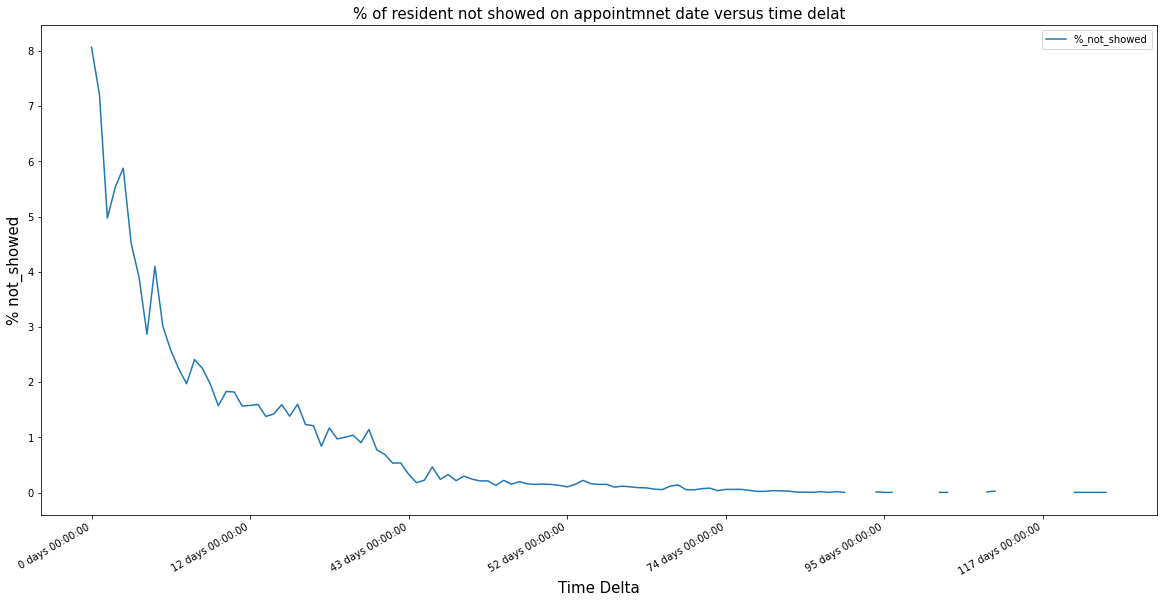

In [114]:
df_combined.plot(x='time_delta',y='%_not_showed',kind='line' , figsize=(20,10));
plt.title('% of resident not showed on appointmnet date versus time delat',fontsize = 15);
plt.xlabel('Time Delta', fontsize=15);
plt.ylabel('% not_showed', fontsize=15);

__From above, we can see that when time difference between appointmnet time and schedule time increase, the % of non showed patient increase.__

__Factor_10 : age__

In [115]:
df['age'].describe()

count    109897.000000
mean         37.082969
std          23.115363
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: age, dtype: float64

In [116]:
bin_edges = [0,18,37,55,100]

In [117]:
bin_name = ['Children','Youth','Adults','Seniors']

In [118]:
df['age_range'] = pd.cut(df['age'],bin_edges,labels=bin_name)

In [119]:
age_range_shown_per = df.groupby('no_show')['age_range'].value_counts(True)[0]*100

In [120]:
age_range_not_shown_per = df.groupby('no_show')['age_range'].value_counts(True)[1]*100

In [121]:
df_showed = pd.DataFrame(age_range_shown_per)
df_not_showed = pd.DataFrame(age_range_not_shown_per)

In [122]:
df_showed.rename(columns={'age_range':'%showed'},inplace = True)
df_not_showed.rename(columns={'age_range':'%_not_showed'},inplace = True)

In [123]:
df_showed.reset_index(inplace = True)
df_not_showed.reset_index(inplace = True)

In [124]:
df_combined = df_showed.merge(df_not_showed, left_on='age_range', right_on='age_range', how='outer')

In [125]:
df_combined.set_index('age_range',inplace = True)

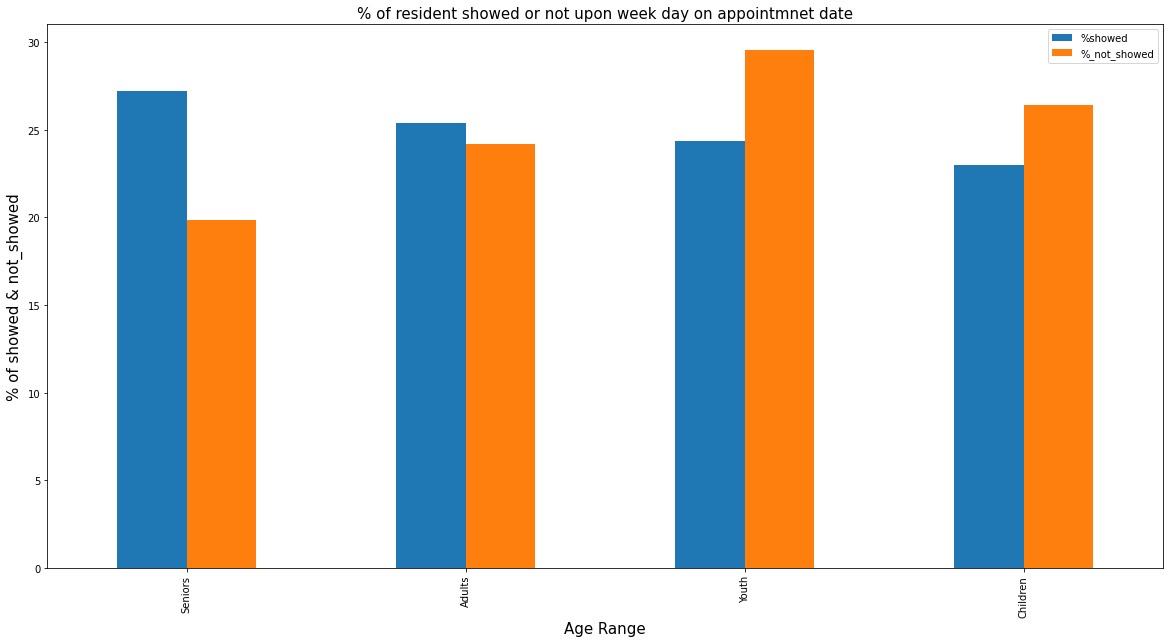

In [126]:
df_combined.plot(kind='bar',figsize=(20,10))
plt.title('% of resident showed or not upon week day on appointmnet date',fontsize = 15);
plt.xlabel('Age Range', fontsize=15);
plt.ylabel('% of showed & not_showed', fontsize=15);

__From above, we can see that % of children and youth not showed at appointment date is hihger. For adult, no difference. For seniors, % of showed is higher.__

<a id='conclusions'></a>
## Conclusions

> 1- Percentage of showen patient is much higher than non showen.<br>2- Certain neighbourhood show high percentage of non showen which need more investigation.<br>3- Unfortunately patient receiving SMS show less showen percentage.<br>4- Alcholism, handicap, hypertension,week day,diabetes and scholarship have no effect on percentage of showen.<br>5- As time difference between scheduale and appointmnet increase, rate of non showen increase.<br>6- As age range increase, percentage of non showen decrease.
<br>
<br>
<a id='conclusions'></a>
## Limitation

> 1- Neighbourhood need to be more detailed.<br>2- Clarify rules on which Time Delta(diff. between appointment day and scheduale day) depend .<br>3- Patient with medical insurance must be clarified.<br>4- This analysis is only limited to neighbourhood stated in Brazil.
